# Kernel density estimation

A kernel density is a sum of gausian kernels, centered at the samples of the dataset. The choice of the kernel bandwidth parameter controls the smoothness of the resulting curve. A gaussian kernel is described by two parameters - mean and variance/bandwidth. Here is an example of two differed gaussian kernels both centered at 0 but with different bandwidth. The  KDE algorithm creates such a kernel at each sample of the dataset and then sums the kernels to derive the final probability density function.

KDE is a better alternative to histograms and solves their binning problem (where choice of bins may affect the visualization significantly).

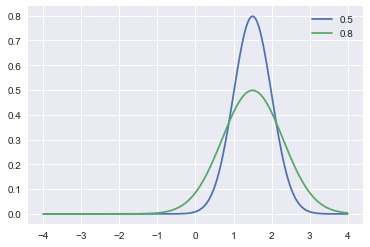

In [28]:
%matplotlib inline

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

support = np.linspace(-4, 4, 200)
kernel1 = stats.norm(0, 0.5).pdf(support)
plt.plot(support,kernel1, label="0.5")

kernel2 = stats.norm(0, 0.8).pdf(support)
plt.plot(support,kernel2, label="0.8")

plt.legend();


# An example of KDE

https://seaborn.pydata.org/tutorial/distributions.html

Seaborn's histograms can also calculate and draw the KDE. Here is an example with the boston dataset that also has rugs (small vertical lines showing the appearance of data points.

c:\users\i040924\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


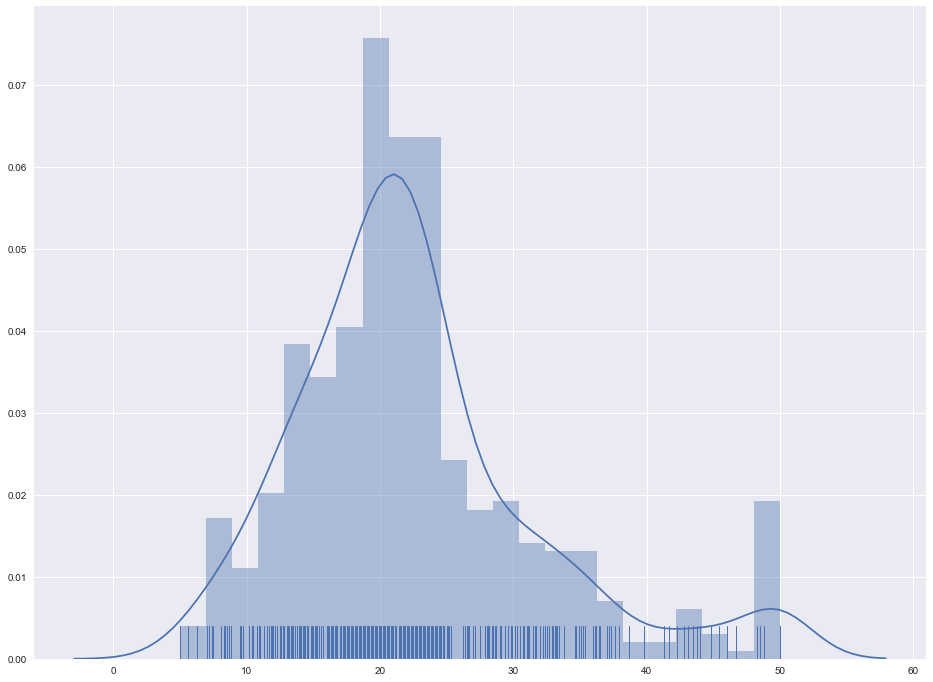

In [31]:
import sklearn
from sklearn.datasets import load_boston

boston = load_boston()
plt.subplots(figsize=(16,12))
sns.distplot(boston.target, rug=True)

With the use of seaborn's kdeplot it is also possbile to control the bandwidth of the kernels. Wider bands result in a smoother estimation.

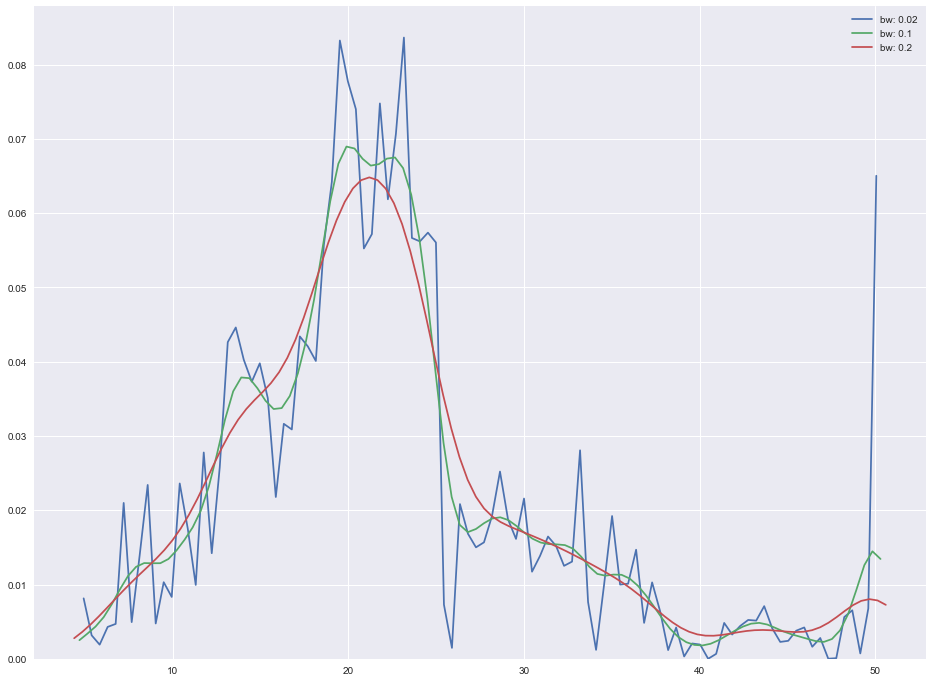

In [9]:
plt.subplots(figsize=(16,12))

sns.kdeplot(boston.target, bw=0.02, label="bw: 0.02")
sns.kdeplot(boston.target, bw=0.1, label="bw: 0.1")
sns.kdeplot(boston.target, bw=0.2, label="bw: 0.2")
plt.legend();

Non-gaussian distributions are possible.

c:\users\i040924\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


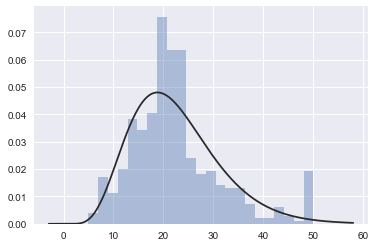

In [34]:

sns.distplot(boston.target,kde=False, fit=stats.gamma)

Scikit Learn has a KDE library that can be used to fit estimators and then sample and score.

In [90]:
from sklearn.neighbors.kde import KernelDensity

x = boston.target.reshape(-1,1) # requires two dimentional data (rows=samples, columns=features)
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(x)

Once the estimator has been fit to the data we can draw samples from it. The resulting sample looks similar to the original distribution.

c:\users\i040924\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


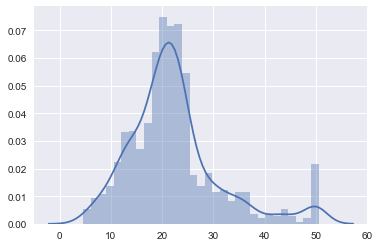

In [91]:
sample = kde.sample(1000)
sns.distplot(sample)

It is also possible to do the opposite, get the probability of a given value/sample.

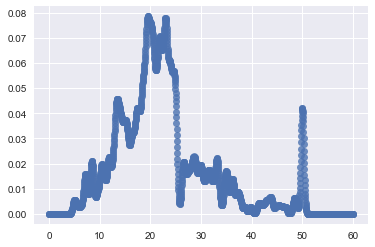

In [92]:
data = np.linspace(0,60,2000)
logprobs = kde.score_samples(data.reshape(-1,1))
#sns.distplot(np.exp(sample))
probs = np.exp(logprobs)
sns.regplot(x=data,y=probs,fit_reg=False)